# Preço de imoveis

**Objetivo**: estimar os preços de imóveis
 * Identificar aspectos que contribuem para precificação dos imoveis
 * Entender qual aspecto é mais relevante, qual influencia mais no preço do imóvel.
 * Precificar um imóvel novo.

Base de dados simplificada e inspirada em [House Prices](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques)



![](https://i.imgur.com/A8X79yq.jpeg)


# 1. Ajustando uma reta

## Conhecendo os dados

In [1]:
import pandas as pd

In [2]:
#Lendo dados
dados = pd.read_csv('dados\\Preços_de_casas.csv')

In [3]:
#Quais fatores coletados?
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1438 entries, 0 to 1437
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Id                              1438 non-null   int64  
 1   area_primeiro_andar             1438 non-null   float64
 2   existe_segundo_andar            1438 non-null   int64  
 3   area_segundo_andar              1438 non-null   float64
 4   quantidade_banheiros            1438 non-null   int64  
 5   capacidade_carros_garagem       1438 non-null   int64  
 6   qualidade_da_cozinha_Excelente  1438 non-null   int64  
 7   preco_de_venda                  1438 non-null   float64
dtypes: float64(3), int64(5)
memory usage: 90.0 KB


In [4]:
dados = dados.drop(columns = "Id")

## Correlação

Quais fatores estão relacionados ao preço da casa? Como é essa relação?

Com o coeficiente de Correlação de Pearson nos permite medir a relação linear entre variáveis, oferecendo uma escala que varia de -1 a 1, que interpretamos conforme sua intensidade e direção:

* -1: correlação positiva perfeita: à medida que uma variável aumenta, a outra também aumenta.
* 0: não há relação linear entre as variáveis.
* 1: indica uma correlação negativa perfeita: à medida que uma variável aumenta, a outra também diminui.



In [5]:
# Correlação
corr = dados.corr()

In [6]:
corr['preco_de_venda']

area_primeiro_andar               0.616557
existe_segundo_andar              0.138541
area_segundo_andar                0.305311
quantidade_banheiros              0.563132
capacidade_carros_garagem         0.640214
qualidade_da_cozinha_Excelente    0.496223
preco_de_venda                    1.000000
Name: preco_de_venda, dtype: float64

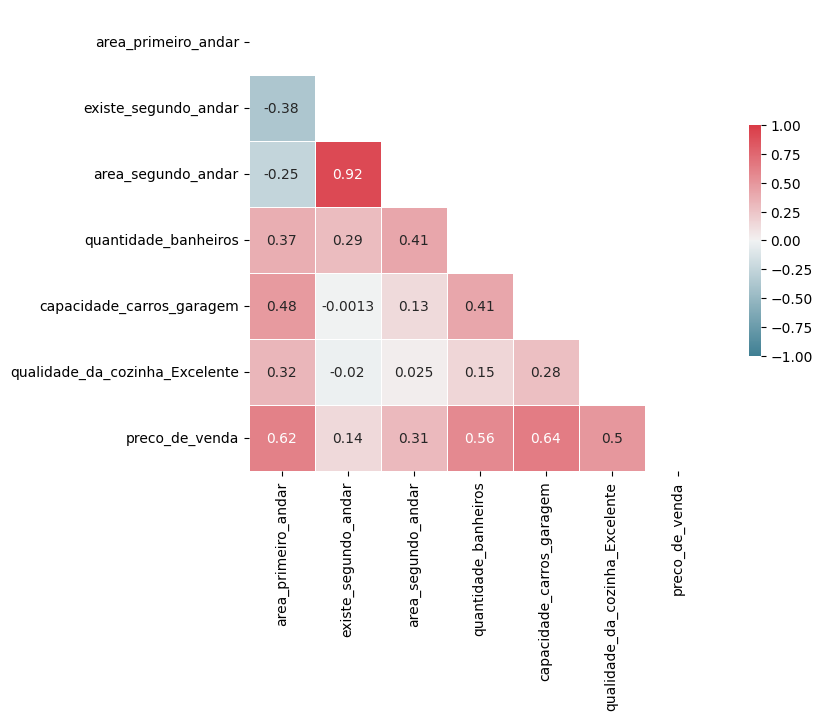

In [7]:
# Atividade
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Quais fatores estão mais correlacionados?

# Gerar uma máscara para o triângulo superior
mascara = np.zeros_like(corr, dtype=bool)
mascara[np.triu_indices_from(mascara)] = True

# Configurar a figura do matplotlib
f, ax = plt.subplots(figsize=(10, 6))

# Gerar o mapa de calor (heatmap)
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mascara, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .5})

# Exibir o mapa de calor (heatmap)
plt.show()

## Relacionando variáveis

In [8]:
# importando as visualizações
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

Text(0, 0.5, 'Preço de venda')

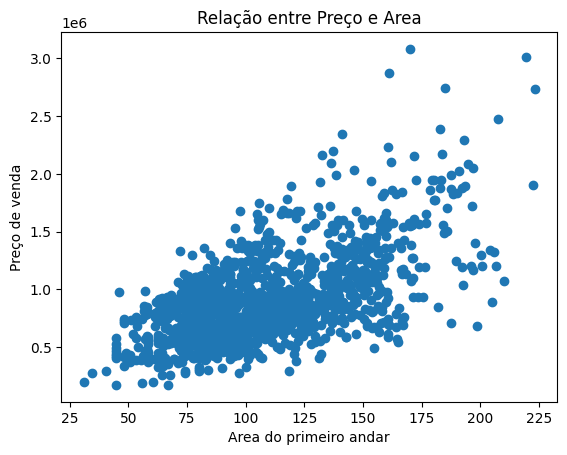

In [9]:
# Como é a relação entre área construida e o preço do imóvel?
plt.scatter(dados['area_primeiro_andar'], dados['preco_de_venda'])
plt.title("Relação entre Preço e Area")
plt.xlabel("Area do primeiro andar")
plt.ylabel("Preço de venda")


Text(0, 0.5, 'Preço de venda')

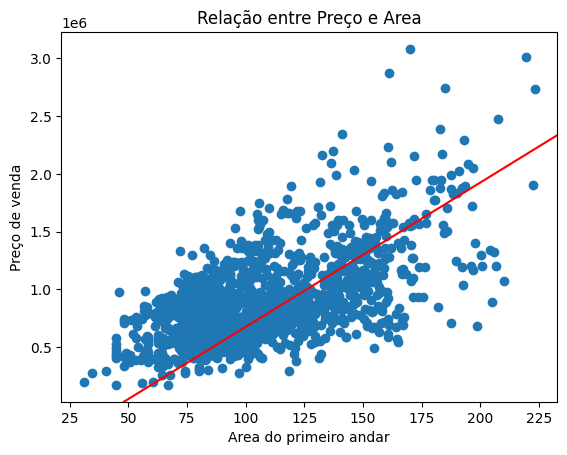

In [10]:
# Aparentemente quanto maior a área do primeiro andar, maior o preço da casa.
# E se quisermos traçar uma linha que melhor representa esse comportamento?
plt.scatter(dados['area_primeiro_andar'], dados['preco_de_venda'])
plt.axline(xy1 = (66, 250000),xy2 = (190, 1800000), color = "red" )
plt.title("Relação entre Preço e Area")
plt.xlabel("Area do primeiro andar")
plt.ylabel("Preço de venda")



## Melhor reta

In [11]:
# Qual a reta que melhor se adequa a relação?
px.scatter(dados, x = 'area_primeiro_andar', y = 'preco_de_venda', trendline_color_override="red", trendline = 'ols' )

# 2. Explicando a reta
Ajustamos uma reta entre o $m^2$ do primeiro andar e o preço da casa. Queremos explicar o preço da casa a partir do seu tamanho, por isso dizemos que:

* Variável explicativa/independente: Área do primeiro andar

* Variável resposta/dependente: Preço da casa

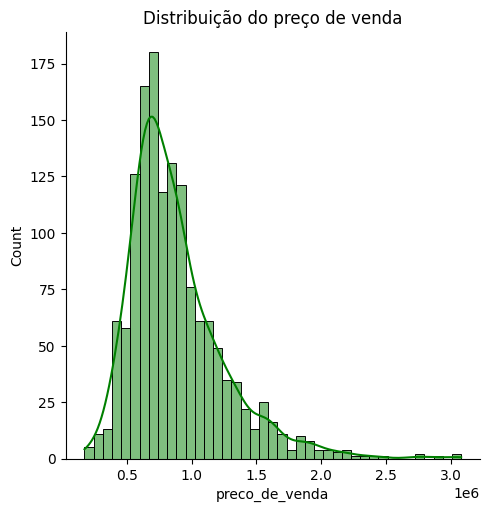

In [12]:
#Quem é nossa variável resposta?

sns.displot(dados['preco_de_venda'], kde=True, color='green')
plt.title('Distribuição do preço de venda')
plt.show()

### Separando em treino e teste

O conjunto de **treinamento** é usado para ajustar o modelo, enquanto o conjunto de **teste** é usado para avaliar seu desempenho em prever preços de casas não vistos durante o treinamento, que auxilia na generalização do modelo.

In [13]:
# import train_test_split

from sklearn.model_selection import train_test_split

In [14]:
# Definindo y e X

y = dados['preco_de_venda']
X = dados.drop(columns=['preco_de_venda'])

In [15]:
#Aplicando o split do y e X

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=230)

In [16]:
#Dados de treino para usar a fórmula

df_train = pd.DataFrame(data = X_train)
df_train['preco_de_venda'] = y_train

In [17]:
# import ols

from statsmodels.formula.api import ols

In [18]:
# ajustando o primeiro modelo

modelo_0 = ols('preco_de_venda ~ area_primeiro_andar', data=df_train).fit()

## Analisando os coeficientes

(intensidade, direção e significância)




In [19]:
# visualizando os parametros

modelo_0.params

Intercept              152909.288334
area_primeiro_andar      6793.641641
dtype: float64

In [20]:
# o resumo do nosso modelo

modelo_0.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         preco_de_venda   R-squared:                       0.377
Model:                            OLS   Adj. R-squared:                  0.377
Method:                 Least Squares   F-statistic:                     608.3
Date:                Tue, 15 Jul 2025   Prob (F-statistic):          2.22e-105
Time:                        02:53:04   Log-Likelihood:                -14082.
No. Observations:                1006   AIC:                         2.817e+04
Df Residuals:                    1004   BIC:                         2.818e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            1.529e+05   3.07e+04      4.981      0.000    9.27e+04    2.13e+05
area_primeiro_andar  6793.6416    275.455     24.663      0.000    6253.109    7334.175
==============================================================================
Omnibus:                      190.778   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              482.457
Skew:                           0.998   Prob(JB):                    1.72e-105
Kurtosis:                       5.743   Cond. No.                         373.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* O **intercepto** é o valor esperado do preço da casa quando todas as outras variáveis são zero. Neste caso, quando todas as outras variáveis a área do primeiro andar é zero, o preço esperado da casa é de R$ 145.196,40. Nem sempre temos uma interpretação prática desse número.

* O **efeito individual** da área é 6833.97. Isso indica que para cada 1m² adicinado à área do primero andar espera-se que o preço da casa aumente em média R$6.833,97.

<img src="https://i.imgur.com/7Cm4Cot.png" width="500"/>


## Explicabilidade do modelo

Quanto a variação da área está explicando os diversos preços das casas?

Nesse caso recorremos a métrica R², o coeficiente de determinação. O R² varia de 0 a 1, onde 1 indica um ajuste perfeito do modelo aos dados, ou seja, todas as variações na variável dependente são explicadas pelas variáveis independentes no modelo. Por outro lado, um R² de 0 indica que o modelo não explica nenhuma variabilidade na variável dependente

In [21]:
# observando o R²

modelo_0.rsquared

np.float64(0.3772801099429788)

## Entendendo o resíduo

In [22]:
# Quem são os residuos

residuos = modelo_0.resid
residuos

1303   -193023.838744
326    -144522.356193
386     399612.747641
615     -68449.596607
236     166010.592859
            ...      
777     465872.680999
271    -497642.319788
723     461150.204718
560    -540482.733402
768     -37547.820756
Length: 1006, dtype: float64

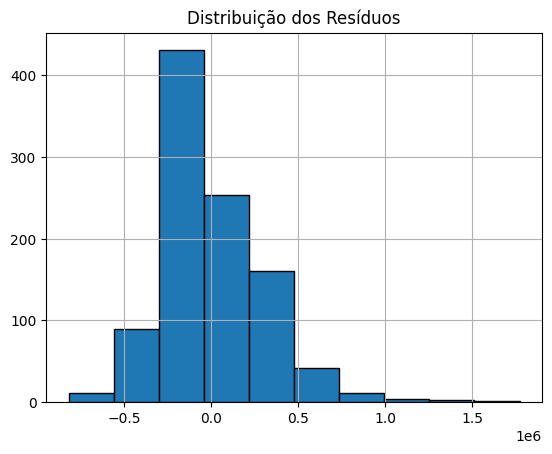

In [23]:
# Como eles estão distribuidos

residuos.hist(edgecolor='black')
plt.title('Distribuição dos Resíduos')
plt.show()

![](https://i.imgur.com/CJMdXpf.png)

## Obtendo o R² da previsão

In [24]:
# definindo o Y previsto

y_predict = modelo_0.predict(X_test)

In [25]:
# importando o r2_score

from sklearn.metrics import r2_score

In [26]:
# printando o r²

print(f"R²: {r2_score(y_test, y_predict)}")

R²: 0.3853092872320242


# 3. Adicionando outras características

O modelo com apenas um fator nos mostrou um R² de 0.37, ou seja, aproximadamente 37% da variação observada nos preços das casas pode ser explicada pela variação na área.
Isso indica que ainda há uma quantidade significativa de variação que não está sendo capturada por esse modelo específico.Vamos analisar outros fatores para explicar o preço das casas.

## Analisando os fatores

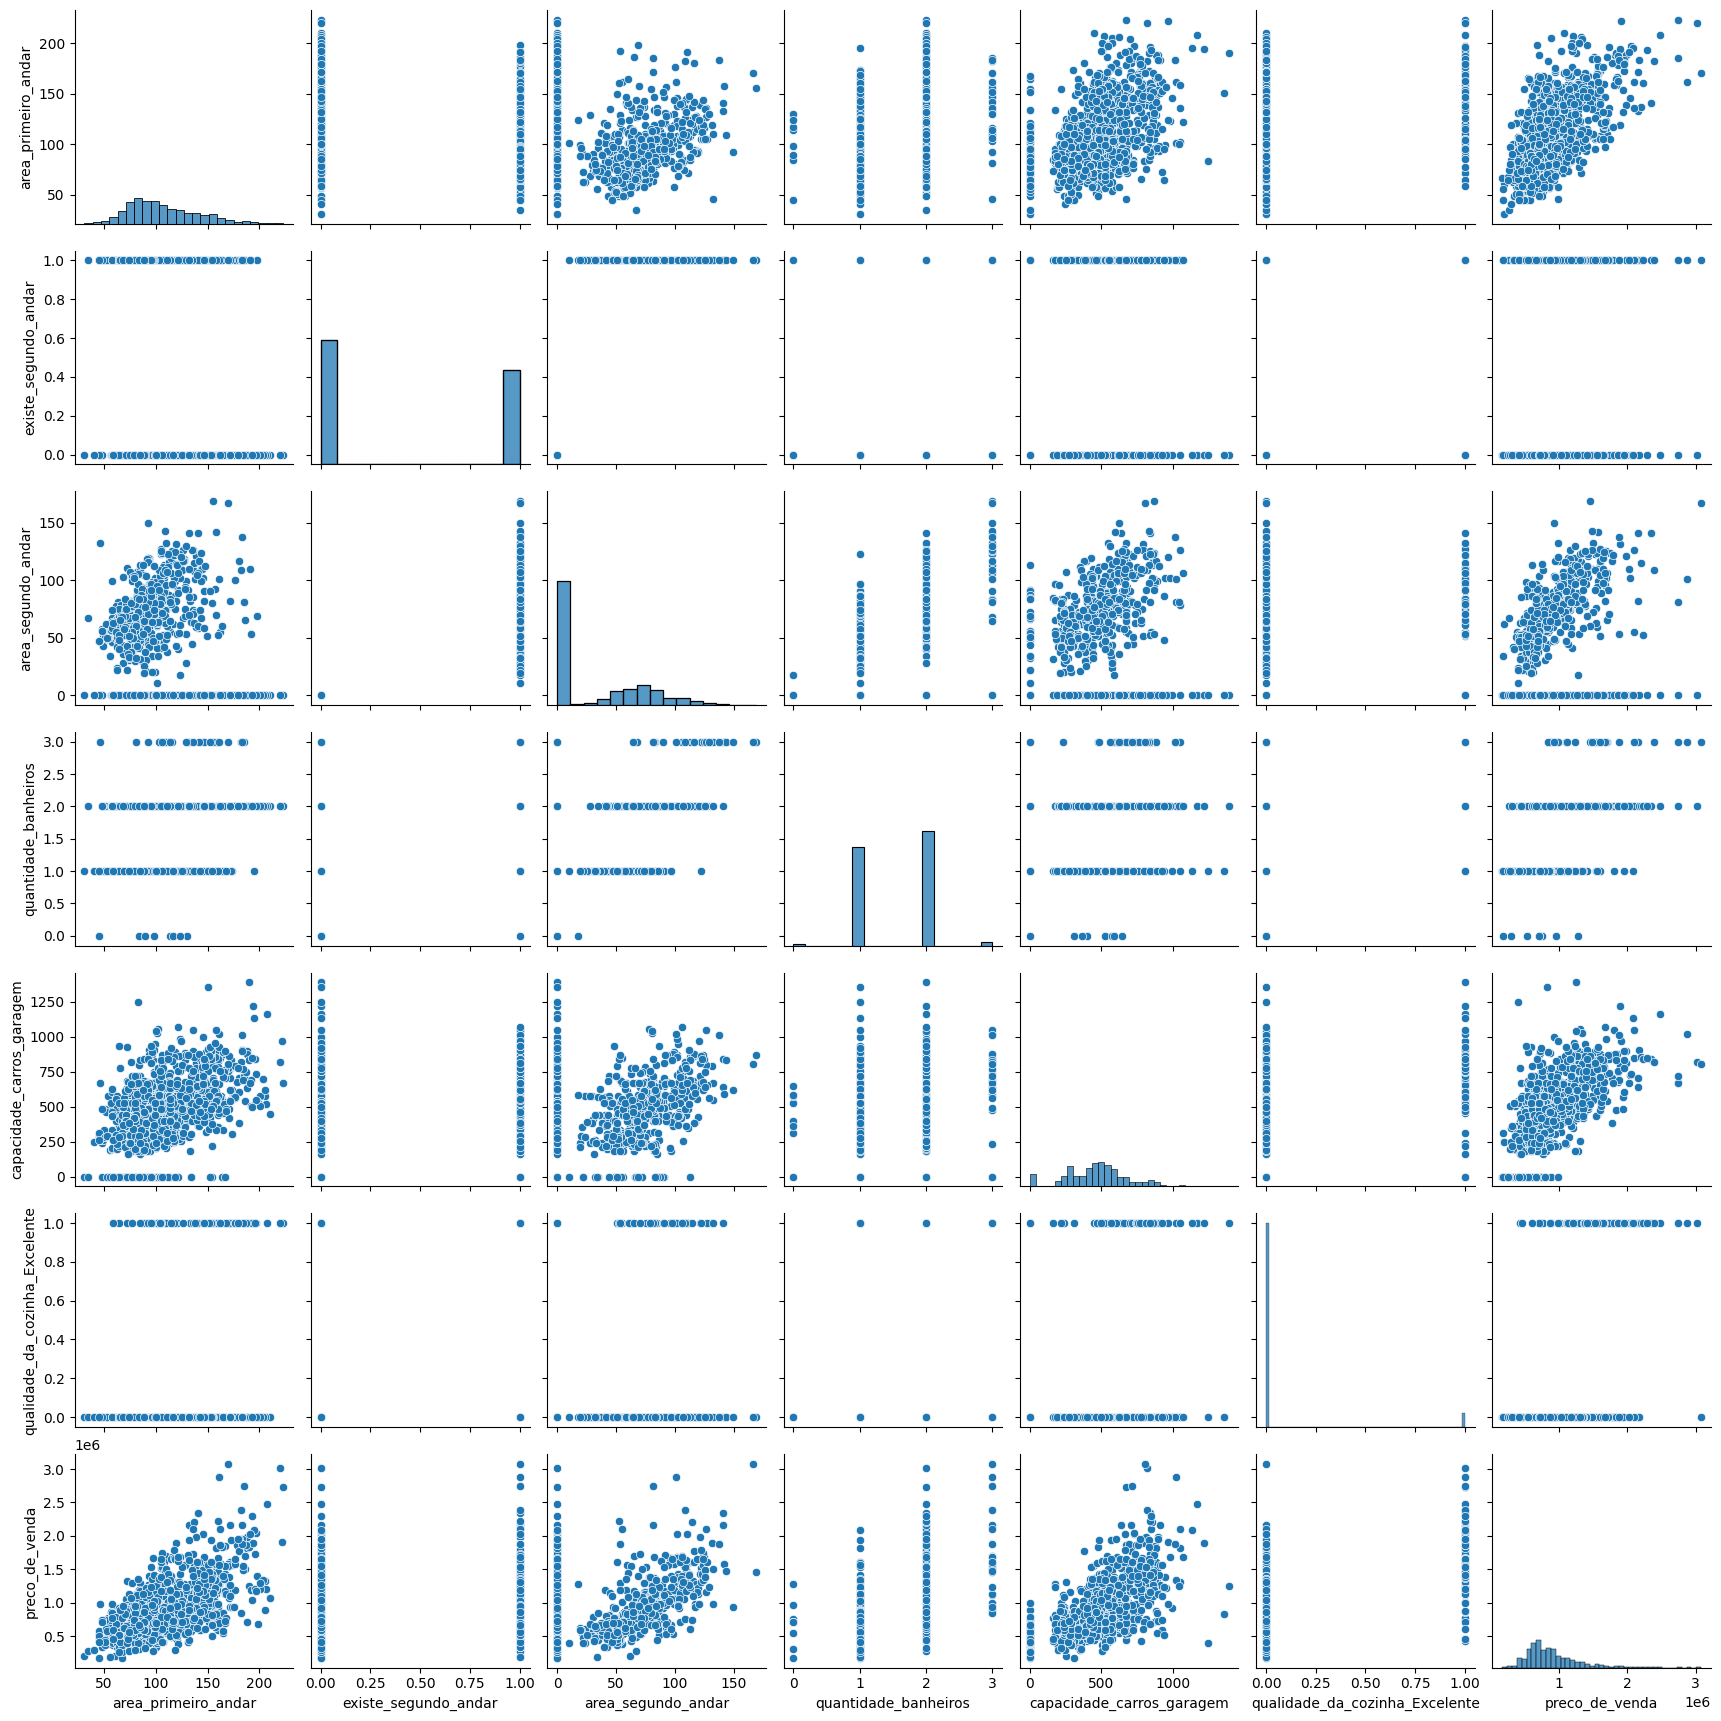

In [27]:
# quais outras características poderiam explicar o preço dos imóveis?

sns.pairplot(dados)


In [28]:
dados.columns

Index(['area_primeiro_andar', 'existe_segundo_andar', 'area_segundo_andar',
       'quantidade_banheiros', 'capacidade_carros_garagem',
       'qualidade_da_cozinha_Excelente', 'preco_de_venda'],
      dtype='object')

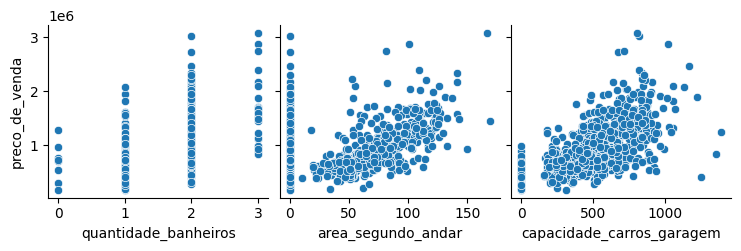

In [29]:
#Vamos olhar apenas com y_vars='preco_de_venda'

sns.pairplot(dados, y_vars = 'preco_de_venda', x_vars = ['quantidade_banheiros', 'area_segundo_andar', 'capacidade_carros_garagem'])

## Adicionando fatores no modelo

In [30]:
# importando a api do statsmodels

import statsmodels.api as sm

In [31]:
# adicionando o constante

X_train = sm.add_constant(X_train)
X_train.head()

,const,area_primeiro_andar,existe_segundo_andar,area_segundo_andar,quantidade_banheiros,capacidade_carros_garagem,qualidade_da_cozinha_Excelente
1303,1.0,65.7732,0,0.0000,1,0,0
326,1.0,55.3684,1,55.3684,1,189,0
386,1.0,74.6916,1,107.4853,2,560,0
615,1.0,103.6764,0,0.0000,1,440,0
236,1.0,94.2006,1,67.8170,2,457,0


In [32]:
X_train.columns

Index(['const', 'area_primeiro_andar', 'existe_segundo_andar',
       'area_segundo_andar', 'quantidade_banheiros',
       'capacidade_carros_garagem', 'qualidade_da_cozinha_Excelente'],
      dtype='object')

In [33]:
# Criando o modelo de regressão (sem fómula): saturado
modelo_1 = sm.OLS(y_train,
                  X_train[['const', 'area_primeiro_andar', 'existe_segundo_andar',
       'area_segundo_andar', 'quantidade_banheiros',
       'capacidade_carros_garagem', 'qualidade_da_cozinha_Excelente']]).fit()

In [34]:
# Modelo sem a área do segundo andar
modelo_2 = sm.OLS(y_train,
                  X_train[['const', 'area_primeiro_andar', 'existe_segundo_andar', 'quantidade_banheiros',
                           'capacidade_carros_garagem', 'qualidade_da_cozinha_Excelente']]).fit()

In [35]:
# Modelo sem informações sobre garagem
modelo_3 = sm.OLS(y_train,
                  X_train[['const', 'area_primeiro_andar', 'existe_segundo_andar', 'quantidade_banheiros', 'qualidade_da_cozinha_Excelente']]).fit()

In [36]:
# Resumo do modelo 1

modelo_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         preco_de_venda   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     477.4
Date:                Tue, 15 Jul 2025   Prob (F-statistic):          2.79e-289
Time:                        02:53:07   Log-Likelihood:                -13640.
No. Observations:                1006   AIC:                         2.729e+04
Df Residuals:                     999   BIC:                         2.733e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                          -6.125e+04   2.66e+04     -2.300      0.022   -1.14e+05   -8995.504
area_primeiro_andar             4875.9606    263.564     18.500      0.000    4358.757    5393.164
existe_segundo_andar           -1.344e+05   3.28e+04     -4.100      0.000   -1.99e+05   -7.01e+04
area_segundo_andar              4709.3824    415.473     11.335      0.000    3894.082    5524.683
quantidade_banheiros            6.463e+04   1.44e+04      4.477      0.000    3.63e+04     9.3e+04
capacidade_carros_garagem        432.7614     34.818     12.429      0.000     364.437     501.086
qualidade_da_cozinha_Excelente  3.779e+05   2.51e+04     15.034      0.000    3.29e+05    4.27e+05
==============================================================================
Omnibus:                      122.435   Durbin-Watson:                   2.087
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              951.557
Skew:                           0.235   Prob(JB):                    2.35e-207
Kurtosis:                       7.741   Cond. No.                     3.24e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.24e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [37]:
# Resumo do modelo 2

modelo_2.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         preco_de_venda   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.707
Method:                 Least Squares   F-statistic:                     485.3
Date:                Tue, 15 Jul 2025   Prob (F-statistic):          1.93e-264
Time:                        02:53:07   Log-Likelihood:                -13701.
No. Observations:                1006   AIC:                         2.741e+04
Df Residuals:                    1000   BIC:                         2.744e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                          -1.418e+05   2.73e+04     -5.202      0.000   -1.95e+05   -8.83e+04
area_primeiro_andar             4746.1134    279.596     16.975      0.000    4197.451    5294.776
existe_segundo_andar            1.929e+05   1.65e+04     11.713      0.000    1.61e+05    2.25e+05
quantidade_banheiros             1.07e+05   1.48e+04      7.224      0.000    7.79e+04    1.36e+05
capacidade_carros_garagem        507.4068     36.303     13.977      0.000     436.167     578.646
qualidade_da_cozinha_Excelente  3.849e+05   2.67e+04     14.423      0.000    3.32e+05    4.37e+05
==============================================================================
Omnibus:                      159.386   Durbin-Watson:                   2.079
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1319.296
Skew:                           0.452   Prob(JB):                    3.30e-287
Kurtosis:                       8.537   Cond. No.                     2.60e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.6e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [38]:
# Resumo do modelo 3

modelo_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         preco_de_venda   R-squared:                       0.651
Model:                            OLS   Adj. R-squared:                  0.650
Method:                 Least Squares   F-statistic:                     467.1
Date:                Tue, 15 Jul 2025   Prob (F-statistic):          4.15e-227
Time:                        02:53:07   Log-Likelihood:                -13790.
No. Observations:                1006   AIC:                         2.759e+04
Df Residuals:                    1001   BIC:                         2.762e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                            -1.3e+05   2.98e+04     -4.367      0.000   -1.88e+05   -7.16e+04
area_primeiro_andar             6119.6532    286.041     21.394      0.000    5558.344    6680.963
existe_segundo_andar            2.213e+05   1.79e+04     12.390      0.000    1.86e+05    2.56e+05
quantidade_banheiros             1.49e+05   1.58e+04      9.407      0.000    1.18e+05     1.8e+05
qualidade_da_cozinha_Excelente  4.444e+05   2.88e+04     15.437      0.000    3.88e+05    5.01e+05
==============================================================================
Omnibus:                      119.666   Durbin-Watson:                   2.096
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              627.200
Skew:                           0.403   Prob(JB):                    6.39e-137
Kurtosis:                       6.783   Cond. No.                         547.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Comparando modelos
Qual o melhor modelo?


In [39]:
print("R²")
print(f"Modelo 0: {modelo_0.rsquared}")
print(f"Modelo 1: {modelo_1.rsquared}")
print(f"Modelo 2: {modelo_2.rsquared}")
print(f"Modelo 3: {modelo_3.rsquared}")

R²
Modelo 0: 0.3772801099429788
Modelo 1: 0.7414024156090393
Modelo 2: 0.7081440416220739
Modelo 3: 0.6511289354898804


In [40]:
#Quantos parametros estão no modelo?
print(len(modelo_0.params))
print(len(modelo_1.params))
print(len(modelo_2.params))
print(len(modelo_3.params))



2
7
6
5


In [41]:
modelo_3.params

const                            -129979.678094
area_primeiro_andar                 6119.653184
existe_segundo_andar              221306.959705
quantidade_banheiros              149036.289458
qualidade_da_cozinha_Excelente    444391.228573
dtype: float64

# 4. Precificando as casas

## Obtendo o R² da previsão

In [42]:
# Adicionando uma constante em X_test
X_test = sm.add_constant(X_test)
X_test.columns

Index(['const', 'area_primeiro_andar', 'existe_segundo_andar',
       'area_segundo_andar', 'quantidade_banheiros',
       'capacidade_carros_garagem', 'qualidade_da_cozinha_Excelente'],
      dtype='object')

In [43]:
modelo_3.params

const                            -129979.678094
area_primeiro_andar                 6119.653184
existe_segundo_andar              221306.959705
quantidade_banheiros              149036.289458
qualidade_da_cozinha_Excelente    444391.228573
dtype: float64

In [44]:
# Prevendo com o modelo 3

predict_3 = modelo_3.predict(X_test[['const', 'area_primeiro_andar', 'existe_segundo_andar', 'quantidade_banheiros', 'qualidade_da_cozinha_Excelente']])

In [45]:
# Qual o r² da previsão?

modelo_3.rsquared

np.float64(0.6511289354898804)

In [46]:
# Qual o R² do treino?

print("R² do treino: ", r2_score(y_test, predict_3))

R² do treino:  0.6432078074497707


## Precificando uma casa


<img src="https://i.imgur.com/e4gytI1.png" width="800"/>

In [47]:
modelo_3.params

const                            -129979.678094
area_primeiro_andar                 6119.653184
existe_segundo_andar              221306.959705
quantidade_banheiros              149036.289458
qualidade_da_cozinha_Excelente    444391.228573
dtype: float64

In [48]:
#Novo imovel

novo_imovel = pd.DataFrame({
    'const': [1],
    'area_primeiro_andar': [120],
    'existe_segundo_andar': [1],
    'quantidade_banheiros': [2],
    'qualidade_da_cozinha_Excelente': [0]  # Supondo que a cozinha não seja excelente
})

In [49]:
# Qual o preço desse imóvel com o modelo 0?

modelo_0.predict(novo_imovel['area_primeiro_andar'])

0    968146.285305
dtype: float64

In [60]:
# Qual o preço desse imóvel com o modelo 3?

print(modelo_3.predict(novo_imovel)[0])

1123758.2426020517


## Precificando várias casas

<img src="https://i.imgur.com/i0skFlB.jpeg" width="600"/>

In [52]:
# Lendo várias casas?

novas_casas = pd.read_csv('dados\\Novas_casas.csv', sep=';')
novas_casas.head()

,Casa,area_primeiro_andar,existe_segundo_andar,quantidade_banheiros,qualidade_da_cozinha_Excelente
0,1,150,1,2,1
1,2,180,0,3,1
2,3,120,1,2,1
3,4,200,1,3,1
4,5,160,0,2,1


In [ ]:
novas_casas = novas_casas.drop(columns= "Casa")

In [55]:
# Adicionando uma constante

novas_casas = sm.add_constant(novas_casas)

In [57]:
# Qual o preço dessas novas casas?

modelo_3.predict(novas_casas)

0    1.751739e+06
1    1.863058e+06
2    1.568149e+06
3    2.206758e+06
4    1.591629e+06
5    1.246151e+06
6    1.357470e+06
7    1.552134e+06
8    9.636478e+05
9    1.639974e+06
dtype: float64

# 5. Investigando o modelo





## Multicolinearidade


Quando duas ou mais coisas que você está tentando estudar são tão parecidas que é difícil dizer o quanto cada uma delas está influenciando o resultado.

In [ ]:
# import do VIF do statsmodel
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
explicativas_1 = ['const','area_primeiro_andar', 'existe_segundo_andar',
       'area_segundo_andar', 'quantidade_banheiros',
       'capacidade_carros_garagem', 'qualidade_da_cozinha_Excelente']

explicativas_2 = ['const','area_primeiro_andar', 'existe_segundo_andar',
       'quantidade_banheiros', 'capacidade_carros_garagem',
       'qualidade_da_cozinha_Excelente']

explicativas_3 = ['const','area_primeiro_andar', 'existe_segundo_andar',
       'quantidade_banheiros', 'qualidade_da_cozinha_Excelente']

In [ ]:
# VIF 1



In [ ]:
# VIF 3


## Análise dos resíduos

Resíduos: a discrepância entre os valores reais e os valores que o modelo prevê para os mesmos pontos de dados.

In [ ]:
# Prevendo os valores do treino X_train[explicativas_3]



In [ ]:
# Fazendo um scatter plot entre y_previsto e y_train

fig = px.scatter(x=     , y=      ,
                 title='Previsão X Real',
                 labels={'x':'Preço previsto','y':'Preço real'})
fig.show()

In [ ]:
# Residuos


In [ ]:
ax = sns.scatterplot(x=       , y=        , s=150)
ax.figure.set_size_inches(20, 8)
ax.set_title('Resíduos X Previsão', fontsize=18)
ax.set_xlabel('Preço da Casa - Previsão', fontsize=14)
ax.set_ylabel('Resíduos', fontsize=14)
ax

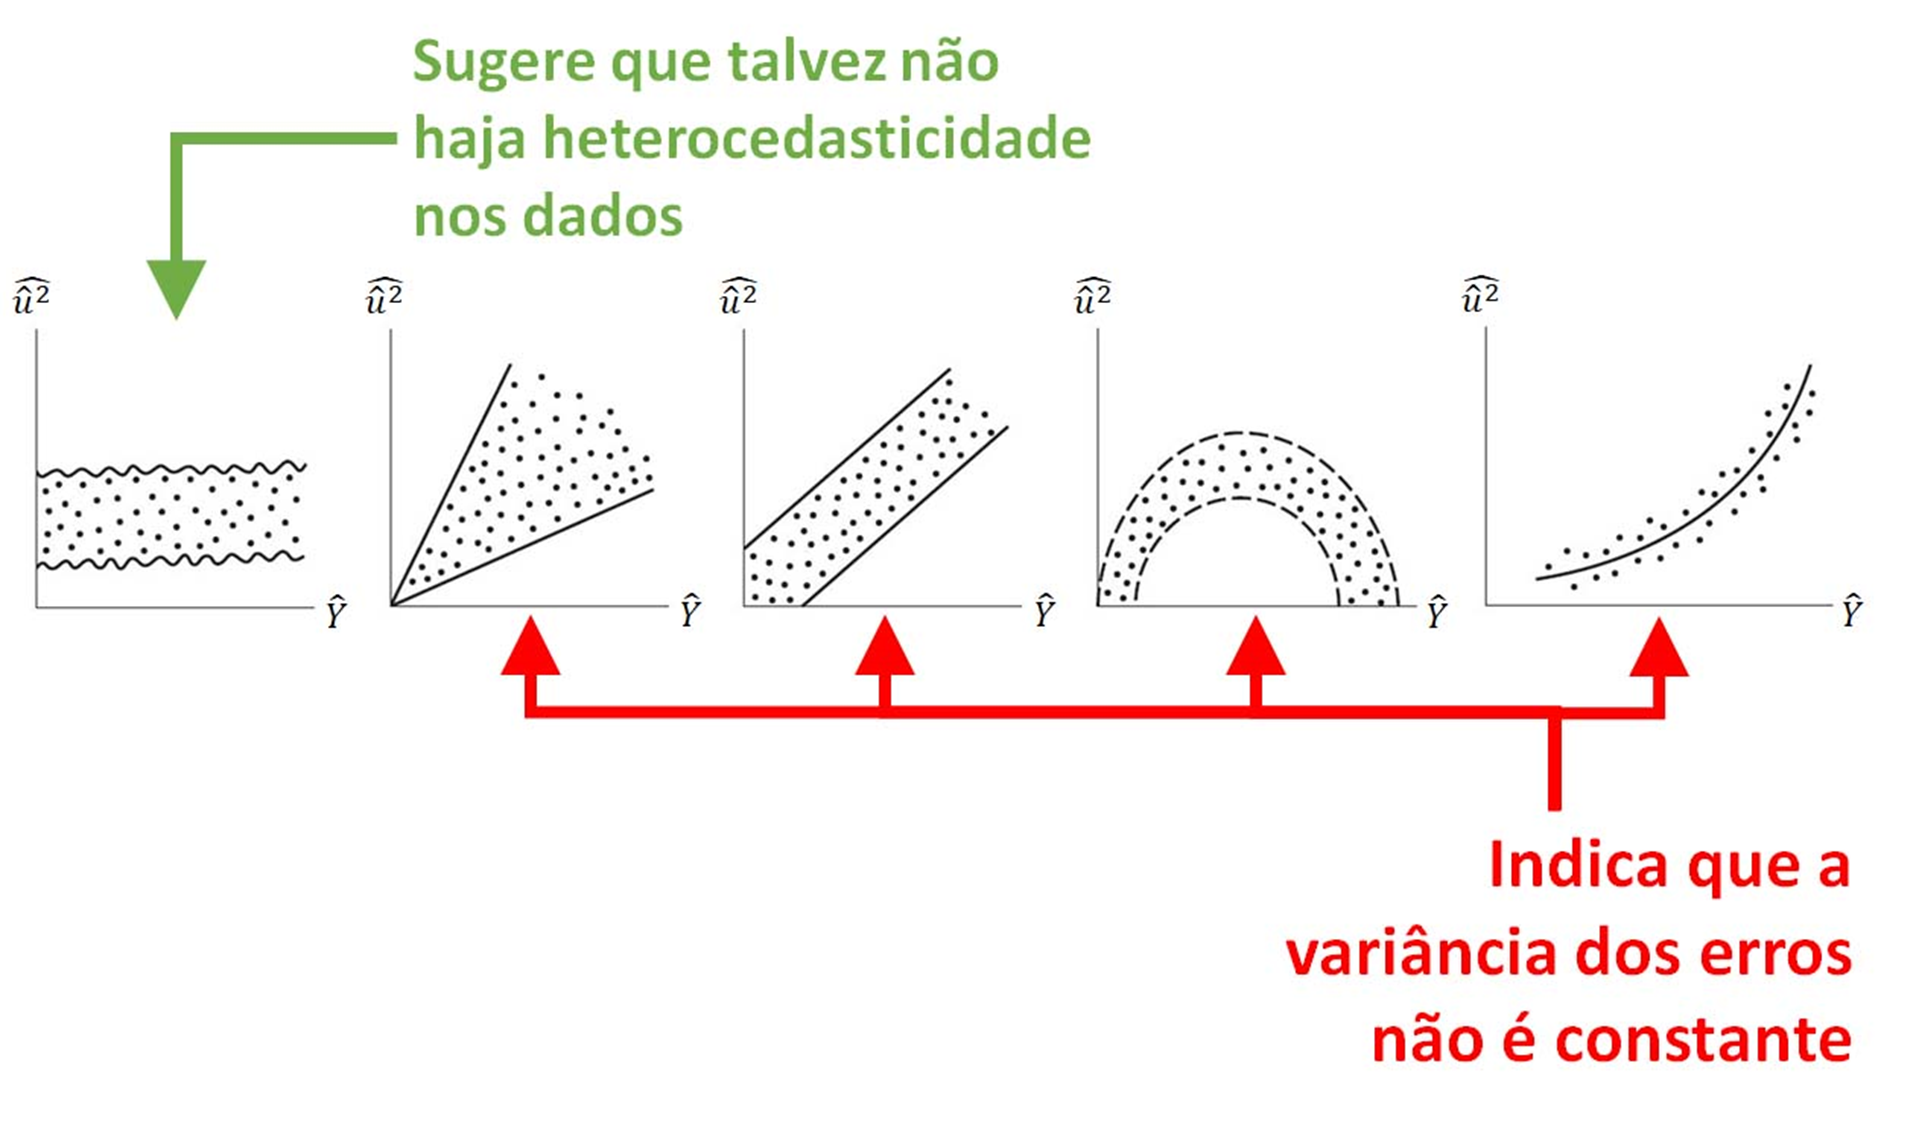